In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thesis')
import pandas as pd

In [2]:
root = "sfh_1000_10_20251127_105848"

def load_data(n):
    data = np.load(f"/data/mustard/vmehta/{root}/{n}_pred_labels.npy")
    return data

pred_labels_all = [10**(load_data(n)) for n in [10,25,50,100,250,500]]
real_labels_all = 10**(np.load(f"/data/mustard/vmehta/{root}/true_labels.npy"))

bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

In [3]:
def rmse(m):
    from sklearn.metrics import mean_squared_error

    rmse = np.sqrt(mean_squared_error(real_labels_all, pred_labels_all[m], multioutput='raw_values'))
    overall_rmse = np.sqrt(mean_squared_error(real_labels_all, pred_labels_all[m]))

    df = pd.DataFrame({
        "Label": range(1,11),
        "RMSE": rmse,
    })
    df.loc[len(df.index)] = ["Overall", overall_rmse]

    return df

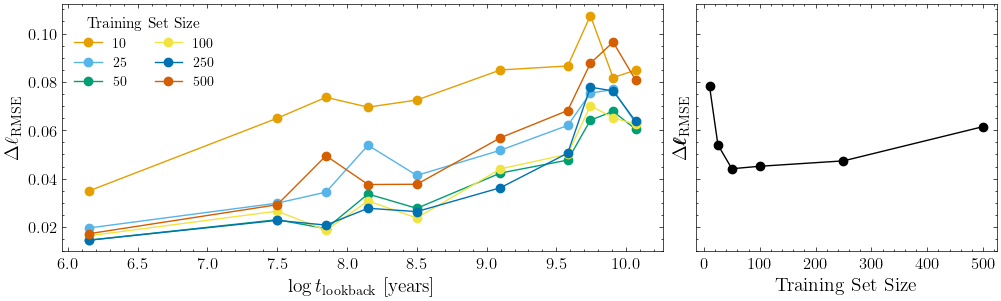

In [4]:
# comparing different size training set

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True, constrained_layout=True, gridspec_kw={'width_ratios': [2, 1]})

overall = []
for m in range(len(pred_labels_all)):
    df = rmse(m)
    rmses = df['RMSE'][:-1]
    overall.append(df['RMSE'].iloc[-1])
    labels = df['Label'][:-1]

    ax[0].plot(bin_centers, rmses, marker='o')

ax[1].plot([10, 25, 50, 100, 250, 500], overall, 'k', marker='o')
ax[0].legend(['10', '25', '50', '100', '250', '500'], title='Training Set Size', loc='upper left', ncol=2, fontsize=10)
ax[0].set_ylabel("$\\Delta\\ell_\\mathrm{RMSE}$")
ax[0].set_xlabel("$\\log t_\\mathrm{lookback}$ [years]")
ax[1].set_ylabel("$\\Delta\\pmb\\ell_\\mathrm{RMSE}$")
ax[1].set_xlabel("Training Set Size")
plt.savefig('/home/vmehta/honours-project/thesis/figures/training_set.pdf', format='pdf')
plt.show()

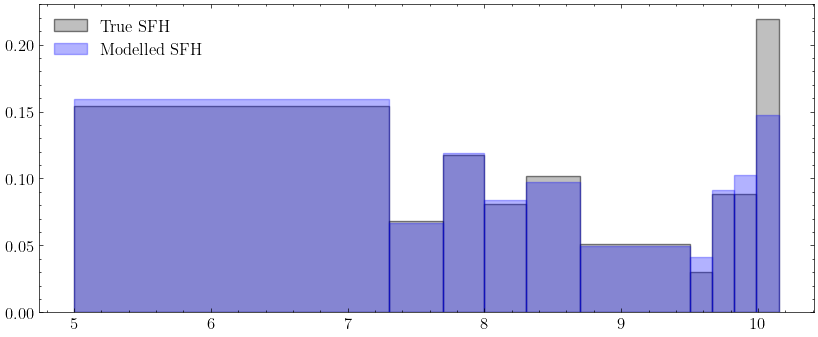

In [27]:
plt.figure(figsize=(10,4))
plt.bar(bin_centers, real_labels_all[20], width=bin_widths, align='center', color='grey', alpha=0.5, edgecolor='black', label='True SFH')
plt.bar(bin_centers, pred_labels_all[2][20], width=bin_widths, align='center', alpha=0.3, color='blue', edgecolor='blue', label='Modelled SFH')
plt.legend()